In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
import tensorflow as tf

[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


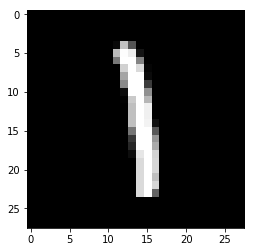

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
batch_xs, batch_ys = mnist.train.next_batch(1)
X = batch_xs
X = X.reshape([28,28])
plt.gray()
print (batch_ys)
plt.imshow(X)

In [31]:
x = tf.placeholder(tf.float32, [None,784])
w = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.nn.softmax(tf.matmul(x,w) + b)

In [32]:
y_ = tf.placeholder(tf.float32, [None,10])

In [35]:
cross_entropy = tf.reduce_mean( -tf.reduce_sum(y_ *tf.log(y), reduction_indices =[1]))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [37]:
sess = tf.InteractiveSession()

In [39]:
tf.global_variables_initializer().run()

In [41]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

In [42]:
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))

In [43]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

In [44]:
print(sess.run(accuracy, feed_dict= {x: mnist.test.images, y_:mnist.test.labels}))

0.9174
